# Assignment 2

* <b>Do not change the structure</b> of the notebook, only fill in the parts where your code needs to be filled in.

---

* Read carefully if the assignment asks for a Pandas **dataframe** or a Pandas **series**.

--- 

* For your notebook, <b>use as filename</b> `assignment02_vunetID.ipynb`, where `vunetID` is your three letter, three digit VU ID.

In [1]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

### Customer database
Given is a table *orders* with product orders, and a table *customers* with customer info. Merge the two tables together such that the remaining table only has orders for which customer info is available. Assign the final dataframe to the variable *sales*.

In [2]:
orders = pd.DataFrame({'OrderID' : [1, 2, 3, 4, 5, 6, 7],
                       'CustID' : [1, 4, 3, 4, 1, 4, 5], 
                       'Amount' : [23.20, 2.30, 12.93, 54.92, 6.12, 9.60, 70.56]})

customers = pd.DataFrame({'ID' : [1, 2, 3, 4, 6], 
                          'First' : ["Henk", "Petra", "Sjoerd", "Mieke", "Sandjai"], 
                          'Last' : ["Janssen", "de Klomp", "Vermeulen", "Sterk", "Bhulai"],
                          'City' : ["Amsterdam", "Nijmegen", "Maastricht", "Amsterdam", "Diemen"]})

# YOUR CODE HERE
sales = pd.merge(orders, customers, left_on='CustID', right_on='ID')
# YOUR CODE ENDS HERE

In [3]:
display(sales)

,OrderID,CustID,Amount,ID,First,Last,City
0,1,1,23.20,1,Henk,Janssen,Amsterdam
1,5,1,6.12,1,Henk,Janssen,Amsterdam
2,2,4,2.30,4,Mieke,Sterk,Amsterdam
3,4,4,54.92,4,Mieke,Sterk,Amsterdam
4,6,4,9.60,4,Mieke,Sterk,Amsterdam
5,3,3,12.93,3,Sjoerd,Vermeulen,Maastricht


The customer ID of "Sandjai Bhulai" is wrong. It should be 5 instead of 6. Correct the ID and calculate the sum of the sales values for each city. Assign the resulting series with only the total amount of sales to the variable *sales_per_city*.

In [4]:
# YOUR CODE HERE
customers.loc[customers['First'] == 'Sandjai', ['ID']] = 5 #The mistake is at the OG db so I'll fix the value there
sales = pd.merge(orders, customers, left_on='CustID', right_on='ID') #Re-creating the sales variable
display(sales)

grouped_cities = sales['Amount'].groupby(sales['City'])
sales_per_city = grouped_cities.sum()

# YOUR CODE ENDS HERE

,OrderID,CustID,Amount,ID,First,Last,City
0,1,1,23.20,1,Henk,Janssen,Amsterdam
1,5,1,6.12,1,Henk,Janssen,Amsterdam
2,2,4,2.30,4,Mieke,Sterk,Amsterdam
3,4,4,54.92,4,Mieke,Sterk,Amsterdam
4,6,4,9.60,4,Mieke,Sterk,Amsterdam
5,3,3,12.93,3,Sjoerd,Vermeulen,Maastricht
6,7,5,70.56,5,Sandjai,Bhulai,Diemen


In [5]:
print(sales_per_city)

City
Amsterdam     96.14
Diemen        70.56
Maastricht    12.93
Name: Amount, dtype: float64


From the *sales* dataframe, create a new dataframe with as first column the first name (*First*) and the second column the sales amount (*Amount*). Assign this to the variable *new_sales*. Then calculate the total sales amount per person and assign that to the variable *person*. Create a bar plot of the resulting dataframe.

First
Henk       29.32
Mieke      66.82
Sandjai    70.56
Sjoerd     12.93
Name: Amount, dtype: float64

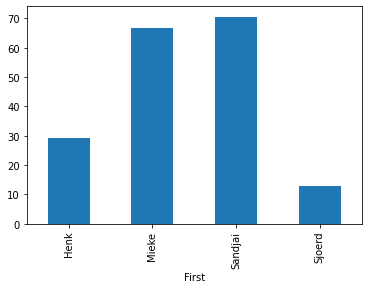

In [6]:
# YOUR CODE HERE
new_sales = sales[['First', 'Amount']]
person = new_sales['Amount'].groupby(new_sales['First']).sum()
person.plot(kind='bar')
person

# YOUR CODE ENDS HERE

In [7]:
display(new_sales)

,First,Amount
0,Henk,23.20
1,Henk,6.12
2,Mieke,2.30
3,Mieke,54.92
4,Mieke,9.60
5,Sjoerd,12.93
6,Sandjai,70.56


### Course grades
The text that is listed below misses a separator between the courses and the grades. Create a regular expression to extract all the grades from the text and assign that value to the variable *avg_grade*. Note that you may have to cast the numbers (that are represented as strings) to floating point numbers.

In [8]:
import re
text = """Data_wrangling8.5
Machine_learning9.0
Advanced_machine_learning8.0
Reinforcement_learning7.5
"""

# YOUR CODE HERE
pattern = r'[0-9]\.[0-9]'

# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.findall(text)

# YOUR CODE HERE
avg_grade = np.mean([float(i) for i in result])


# YOUR CODE ENDS HERE

In [9]:
print(avg_grade)

8.25


### E-mail
Consider the following excerpt from an email. Write a regular expression that extracts the sender, recipient and the subject from the email.

In [23]:
import re
text = """From: Sandjai
To: the students following data wrangling
Subject: well done!
Body: I congratulate you all with mastering regular expressions.
It is a tough subject to learn. Good job.
"""

# YOUR CODE HERE
words = ['From', 'To', 'Subject']
pattern = r'^From:\s([\w]+)\sTo:\s([\w]...+)\sSubject:\s([\w]...+)'

# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.match(text).groups()

result

('Sandjai', 'the students following data wrangling', 'well done!')

In [24]:
print('{} says "{}" to {}'.format(result[0], result[2], result[1]))

Sandjai says "well done!" to the students following data wrangling


### Orange juice
The file below contains sales data on three brands of orange juice over different weeks over different stores. Find out which store number has the highest and lowest mean income (using the variable *INCOME*). Assign the store numbers to the variables *max_store* and *min_store*, respectively.


In [ ]:
oj = pd.read_csv('oj.csv')

# YOUR CODE HERE

# YOUR CODE ENDS HERE

In [ ]:
print("Store number of highest mean income: {}".format(max_store))
print("Store number of lowest mean income : {}".format(min_store))

Create a dataframe with two rows (one for the best store *max_store*, and one for the worst store *min_store*). The columns are the weeks *week* of the orange juice dataset. The values in the dataframe are the sum of the sales (*logmove*) of all three brands. Assign the dataframe to the variable *store_sales*. Then create a plot of the sales with on the x-axis the weeks, and on the y-axis the sum of the sales (the sum of the *logmove*).

In [ ]:
# YOUR CODE HERE

# YOUR CODE ENDS HERE

In [ ]:
display(store_sales)

The previous picture does not explain why the best store does better than the worst store. Let us study if the price influences the sales. Prepare a dataframe with two columns (the column *price* and the column *logmove*), with records only related to *max_store*. Assign this dataframe to variable *oj1*. Also create a table with the *price* and *logmove* with only records for store *min_store*. Assign this dataframe to variable *oj2*. 

In [ ]:
import statsmodels.api as sm

# YOUR CODE HERE

# YOUR CODE ENDS HERE

fit1 = sm.OLS(oj1['logmove'], sm.add_constant(oj1['price'])).fit()
fit2 = sm.OLS(oj2['logmove'], sm.add_constant(oj2['price'])).fit()

print(fit1.params)
print(fit2.params)

In [ ]:
display(oj1, oj2)

The previous analysis explains the difference between the two stores. The best store has almost no sensitivity to the price. The worst store has a high negative sensitivity to the price. Hence, the best store can charge higher prices than the worst store.

Let us now see which brand is the most popular. Create a series in with the three brands (*brand*) and the total number of the sales (sum of *logmove*). Assign the result to the variable *brand_sales*.

In [ ]:
# YOUR CODE HERE

# YOUR CODE ENDS HERE

In [ ]:
print(brand_sales)

The column *feat* determines if the orange juice is on sale. Create a dataframe with as row the different brands of orange juice (*brand*) and as columns the indicator for the sale (*feat*). The values in the dataframe contain the mean price of the specific orange juices. Assign the value to the variable *featured*.

In [ ]:
# YOUR CODE HERE

# YOUR CODE ENDS HERE

In [ ]:
display(featured)